# Exploratory Data Analysis [EDA]
## Lending Club Case study is a consumer finance company 
- specializes in lending various types of loans to urban customers. 
- the company IS Looking for help to make data driven decisions on loan applications received.
## Risks:
* If the applicant is likely to repay the loan, 
    then not approving the loan results in a loss of business
* If the applicant is not likely to repay the loan (default on loan),
    then approving the loan may lead to a financial loss.

### Understand the Data set
- Looking at Nature of data, related data sets, domain, timeframe and size of the data set.
- Metadata
- Loading the Data Set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#setting to display all columns
pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True
#df = pd.read_csv('/kaggle/input/loandata/loan.csv', low_memory=False)
df = pd.read_csv('loan.csv', low_memory=False)
print('shape:',df.shape)
cols=df.columns.sort_values()
#for col in cols:
    #print(col)

shape: (39717, 111)


# UNDERSTANDING THE DATA SET

## Key columns missing from data set, but are part of data dictionary: 
### 1. fico_range_high 
### 2. fico_range_low
### 3. last_fico_range_high
### 4. last_fico_range_low
## From below Analysis here are the Insights
* Categorize columns as Categorical / Dimenssion or Nemuric/Facts
* Each row has person’s loan application details from Apr 2008 to Sep 2011.
* Shape of the data set (Rows: 39717, columns:111)
* There are: float64 – 74 , object – 24 and int64 – 13 as column data types.
* columns with count of unique values as 1 is 60
* Columns with 2-10 unique values -12
* Columns with 11-150 unique values -12
* Columns with only Null values - 54
* Columns with only 1 value – 6
## Looking at the dataframe.describe() we can see that the overall statistical averages.
* get a feel of how the data is spread for each of the columns
* Identify any critical numerical fields that are not in the “describe()” report, and note the Data cleaning requirements.



In [2]:
print('Each row has person\'s loan application details from {} to {}'.format(df['issue_d'].min(),df['issue_d'].max()))
df.shape
try:
    print('get data from issue_id:'+ df['issue_d'][0])
    print('Data Set does not contain key information:'+ df['last_fico_range_high'])
except Exception as  ex:
    print('Error:Data Set does not contain key information:',ex)
    pass
try:
    print('get data from issue_id:'+ df['last_fico_range_lo'][0])
    print(+ df['last_fico_range_lo'])
except Exception as ex:
    print('Error:Data Set does not contain key information:',ex)
    pass
df.info()
df.dtypes.value_counts()

Each row has person's loan application details from Apr-08 to Sep-11
get data from issue_id:Dec-11
Error:Data Set does not contain key information: 'last_fico_range_high'
Error:Data Set does not contain key information: 'last_fico_range_lo'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


float64    74
object     24
int64      13
Name: count, dtype: int64

In [3]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

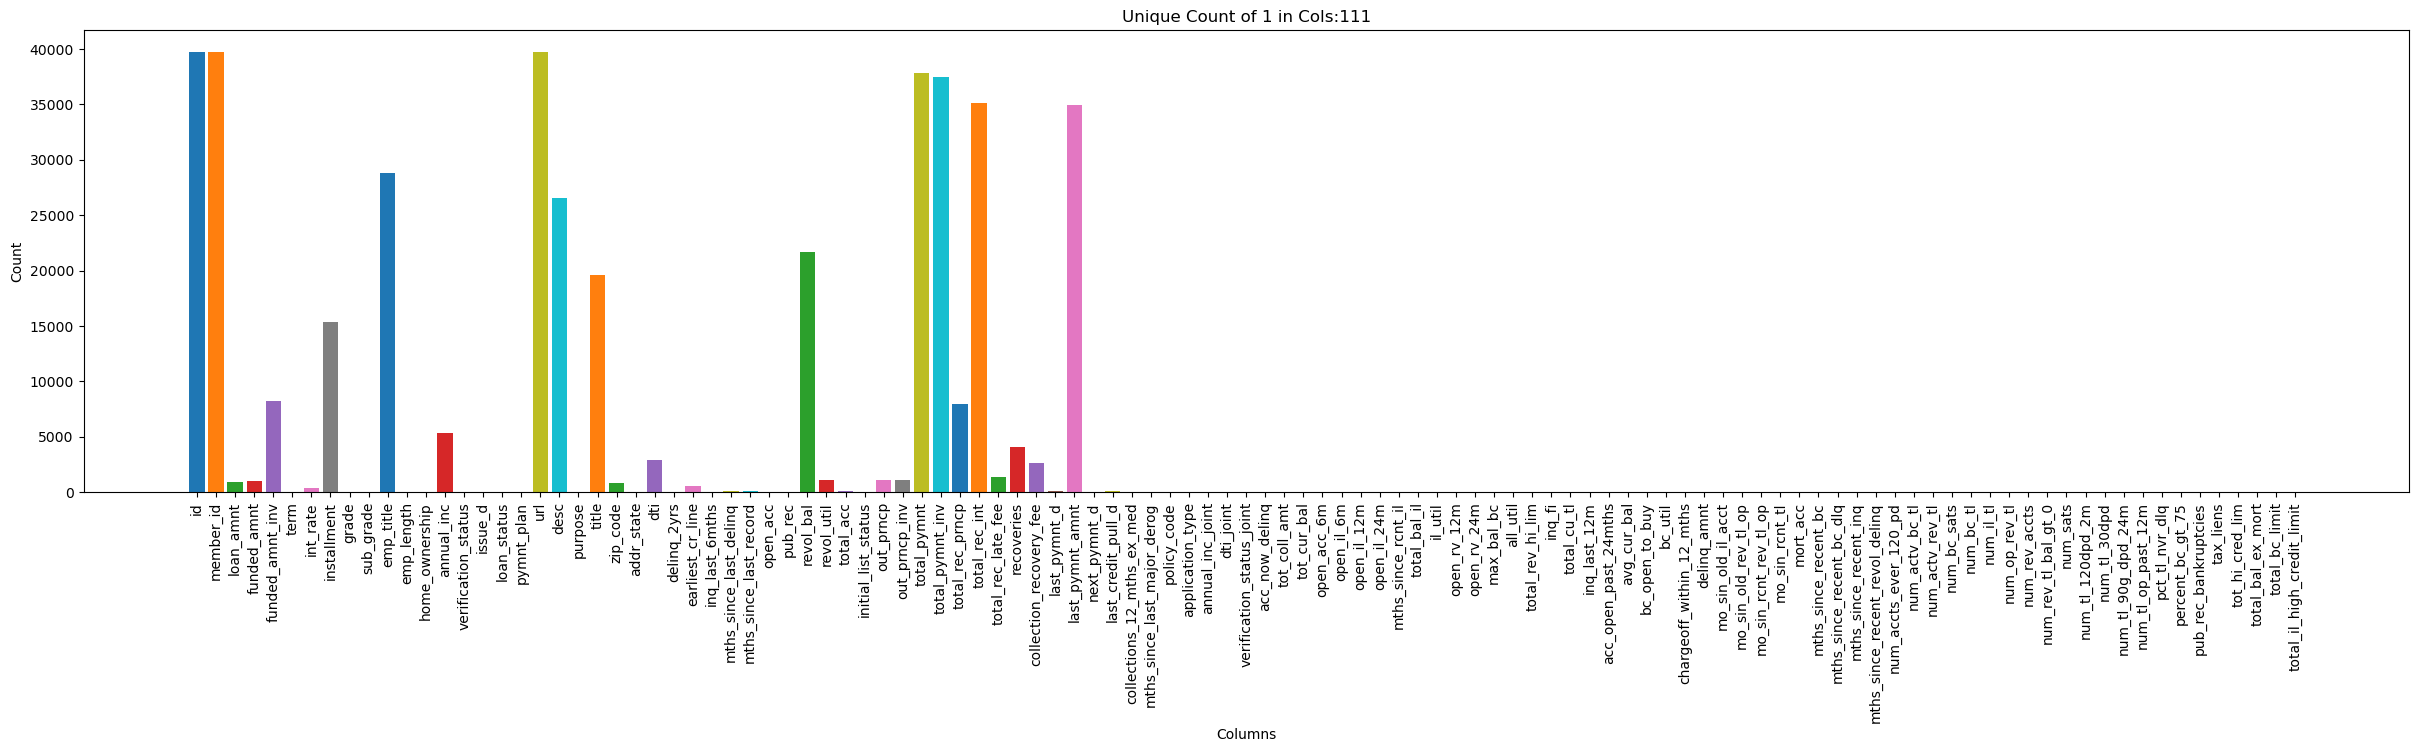

In [4]:
plt.figure(figsize=(30, 6)) 
counts = {}
for col in df.columns:
    unique_values = df[col].unique()
    #if unique_values.size <= 1:
    counts[col] = unique_values.size
        # Plotting the counts
    plt.bar(col, counts[col], label=col)
# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Unique Count of 1 in Cols:{}'.format(len(counts)))
plt.xticks(rotation=90)
plt.show()

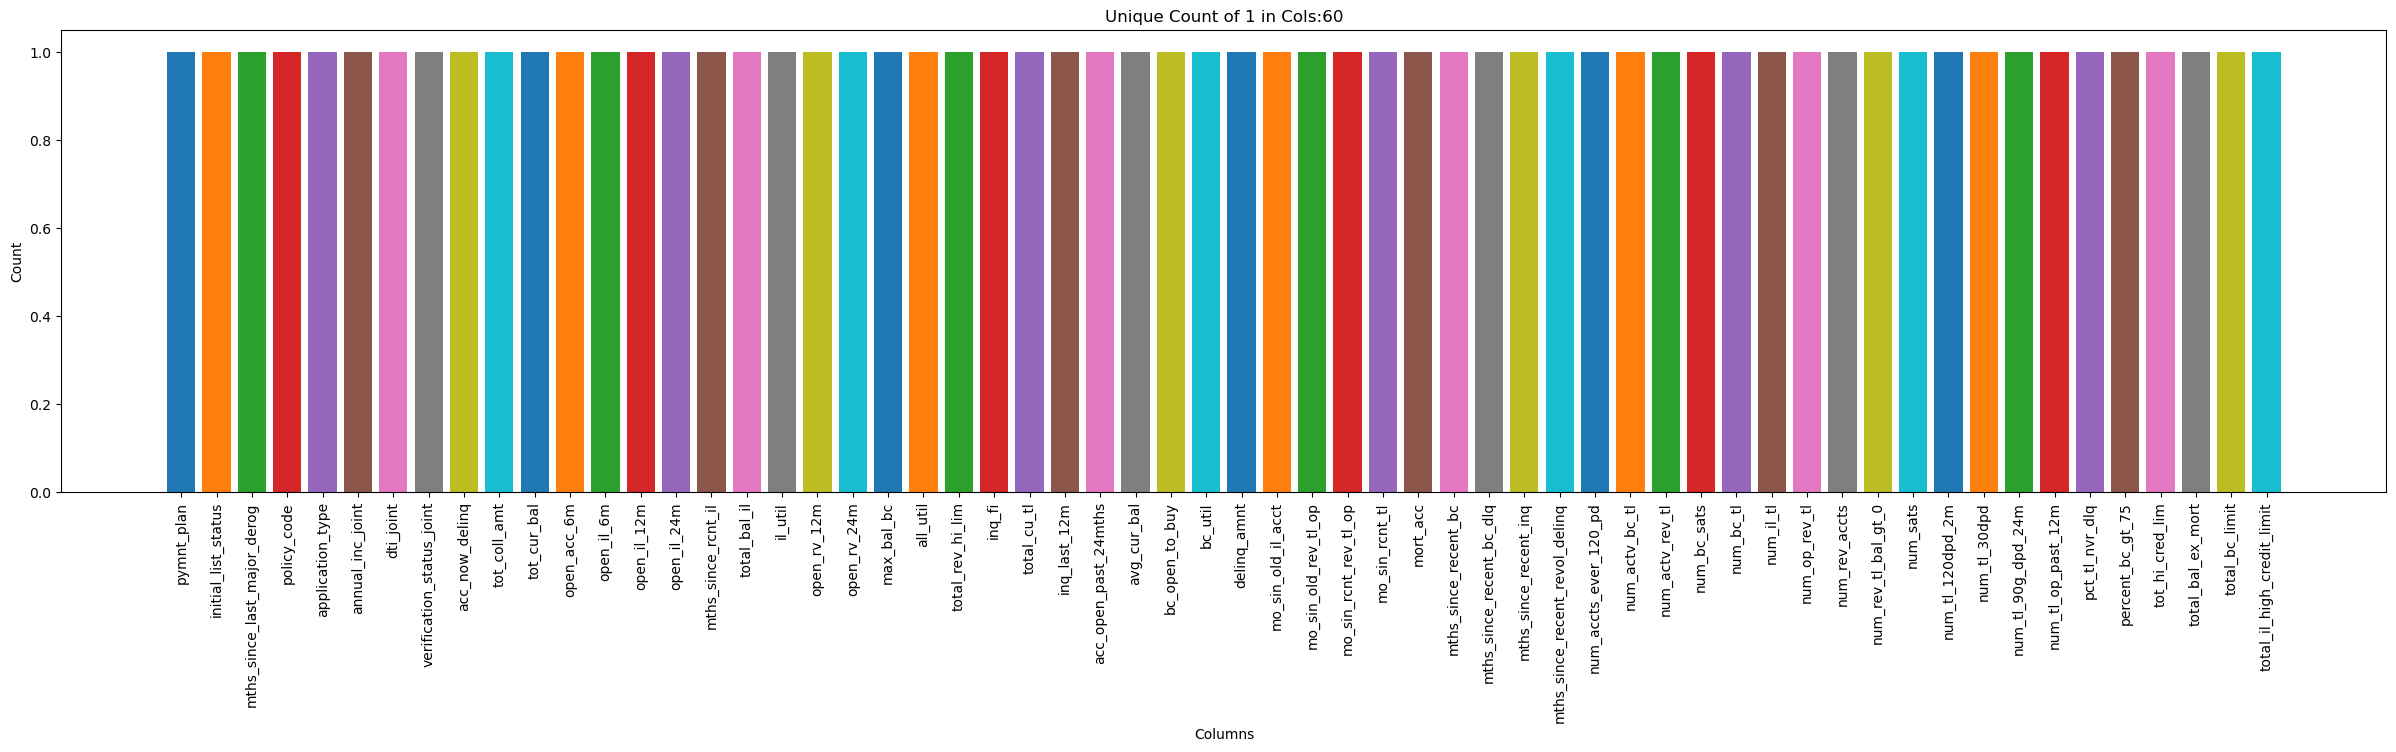

In [5]:
plt.figure(figsize=(30, 6)) 
counts = {}
for col in df.columns:
    unique_values = df[col].unique()
    if unique_values.size <= 1:
        counts[col] = unique_values.size
        # Plotting the counts
        plt.bar(col, counts[col], label=col)
# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Unique Count of 1 in Cols:{}'.format(len(counts)))
plt.xticks(rotation=90)
plt.show()

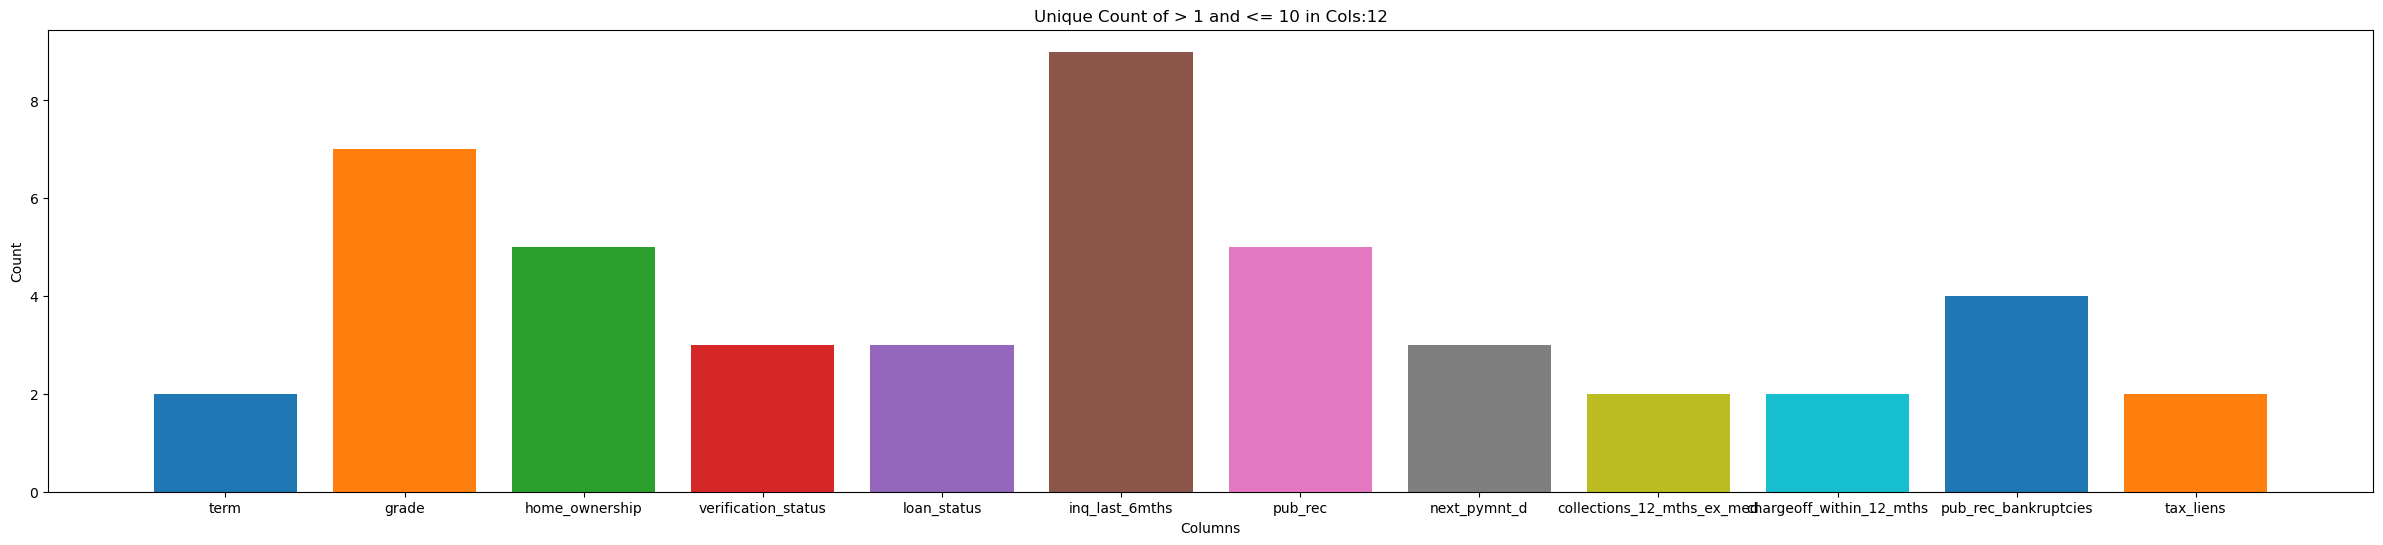

In [6]:
plt.figure(figsize=(30, 6))  
counts = {}
for col in df.columns:
    unique_values = df[col].unique()
    if unique_values.size > 1 and unique_values.size <= 10:
        counts[col] = unique_values.size
        # Plotting the counts
        plt.bar(col, counts[col], label=col)
# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Unique Count of > 1 and <= 10 in Cols:{}'.format(len(counts)))
plt.show()

# DATA CLEANING
* The shape of the data set is : shape: (39717, 111) 
### Cleaning based on Null values
* There are 54 columns with **ALL** Null values value for all the records
* There are 6 columns with 1 unique value and is not null. These columns are not useful and hence dropping from the data frame.
* The shape after removing columns is : (39717, 51)
* The colum is :pymnt_plan and the only value in the column is:['n’]
* The colum is :initial_list_status and the only value in the column is:['f’] 
* The colum is :policy_code and the only value in the column is:[1] 
* The colum is :application_type and the only value in the column is:['INDIVIDUAL’] 
* The colum is :acc_now_delinq and the only value in the column is:[0] 
* The colum is :delinq_amnt and the only value in the column is:[0] 
### Fixing  missing/invalid values.
* Columns > 25000 null values can be dropped as 62% are null values.
* last_credit_pull_d is treated as missing value 2 rows
* title is filled with value “other” for 11 rows
* desc, tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med - deleting the column as all the values are  0
### Standardizing values.
* emp_title has multiple spaces, leading spaces , trailing spaces, caps, mixed cases etc.
* To fix this we change it to lowercase and remove all spaces and replace multiple spaces with single space.
* "term" column is String, so removing "months" from feild value of "term" and rename it as "term_in_months"
* "int_rate"/revol_util column has '%' - No Math metric, remove '%' from field value of 'int_rate'
* process emp_length for - years , + and < (changing < 1 year to 0 and n/a to -1)
* Changing to appropriate data types.


The colum is :pymnt_plan and the only value in the colum is:['n']
The colum is :initial_list_status and the only value in the colum is:['f']
The colum is :policy_code and the only value in the colum is:[1]
The colum is :application_type and the only value in the colum is:['INDIVIDUAL']
The colum is :acc_now_delinq and the only value in the colum is:[0]
The colum is :delinq_amnt and the only value in the colum is:[0]


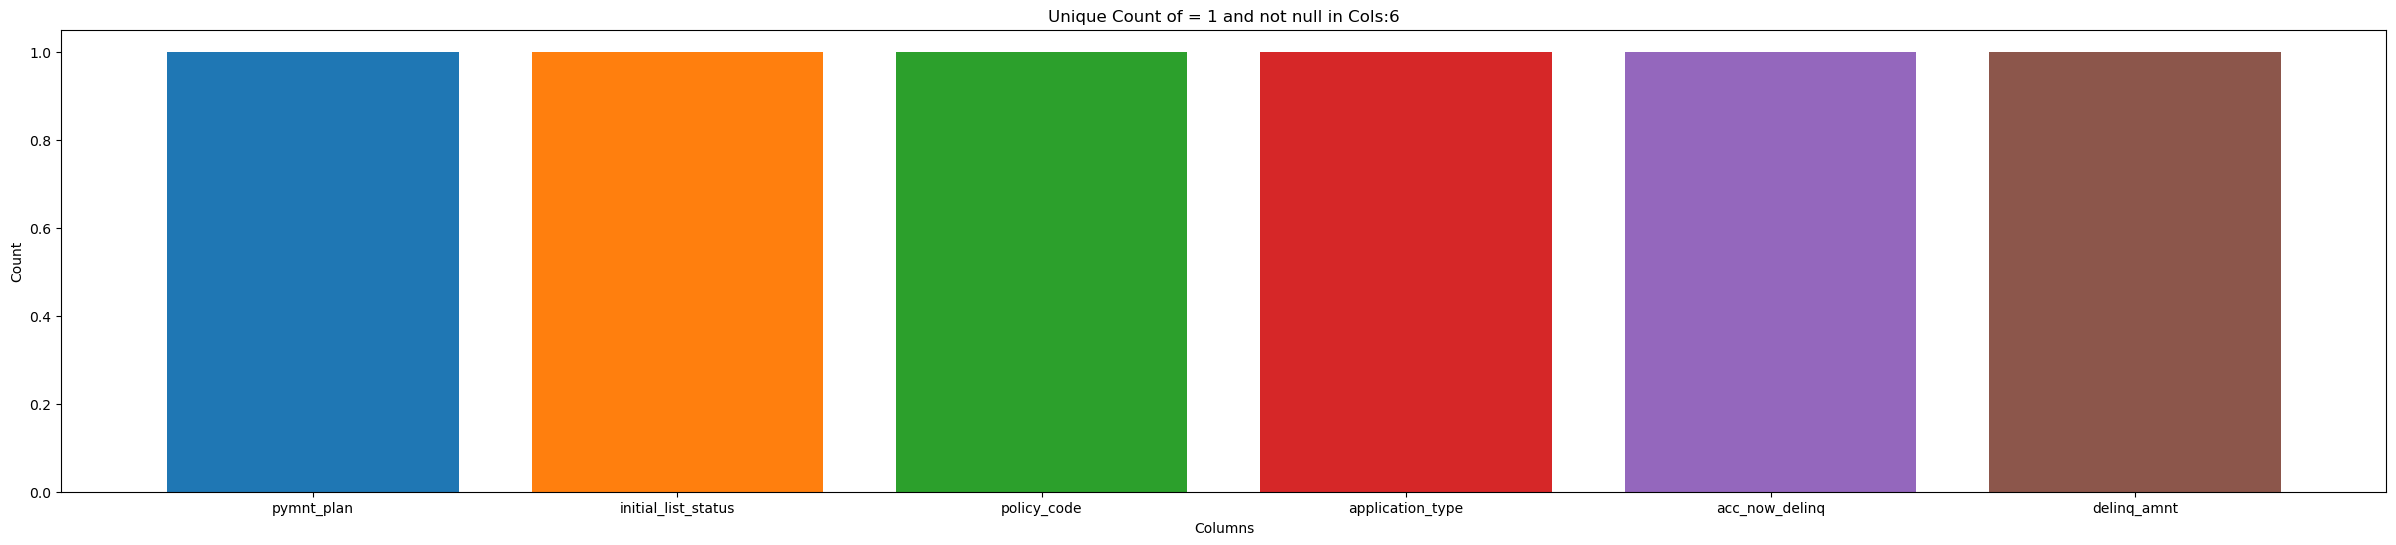

In [7]:
plt.figure(figsize=(30, 6))  
counts = {}
for col in df.columns:
    unique_values = df[col].unique()
    if unique_values.size <= 1 and df[col].notna().all()==True:
        counts[col] = unique_values.size
        print('The colum is :{} and the only value in the colum is:{}'.format(col,unique_values))
        # Plotting the counts
        plt.bar(col, counts[col], label=col)
# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Unique Count of = 1 and not null in Cols:{}'.format(len(counts)))
plt.show()

In [8]:
# 1. There are many columns with **ALL** NaN values & same value for all the records
print(df.shape)
dropcols=[]
dftype_dict = df.dtypes.to_dict()
for col,typ in dftype_dict.items():
    #print(col, typ)
    if  ( len(df[col].unique()) == 1):
        dropcols.append(col)
df.drop(dropcols, axis=1,  inplace=True)
print(df.shape)

(39717, 111)
(39717, 51)


In [9]:
df.shape
#filling with value "Other" for title column
df['title'] = df.title.apply(lambda x: 'Other' if pd.isna(x) else x)
df.drop(['desc','tax_liens', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med','mths_since_last_delinq','mths_since_last_record','next_pymnt_d' ], axis=1,inplace=True)
df.shape


(39717, 44)

In [10]:
print('----Shape of data frame :',df.shape)
dropcols=[]
dftype_dict = df.dtypes.to_dict()
for col,typ in dftype_dict.items():
    #print(col, typ)
    if  ( len(df[col].unique()) == 1):
        #print("{} has only NaN".format(col))
        #if col in ('delinq_amnt','acc_now_delinq','policy_code'):
        #print('Dropping:{} colums with only {} as value. '.format(col,df[col].unique()[0]))
        dropcols.append(col)
df.drop(dropcols, axis=1,  inplace=True)
print('ITEM#1: Shape of data frame :',df.shape)
# 2. "term" column is String, so removing "months" from feild value of "term" and rename it as "term_in_months"
df.term = df.term.apply(lambda x: (x[:-6].lstrip().rstrip()) if ( x.lstrip().lstrip()[-6:]=='months') else x)
df.term = df.term.astype('int64')

# 3. "int_rate"/revol_util column has '%' - No Math metric, remove '%' from field value of 'int_rate'
df.int_rate = df.int_rate.apply(lambda x: (x[:-1].lstrip().rstrip()) if (x[-1]=='%') else x)
df.int_rate = df.int_rate.astype('float64')

df.revol_util = df.revol_util.apply(lambda x: str(x)[:-1] if(len(str(x))>0 and str(x)[-1] == '%') else -1)
df.revol_util = df.revol_util.astype('float64')

# 4. process emp_length for - years , + and < (changing < 1 year to 0 and n/a to -1)
df.emp_length = df.emp_length.apply(lambda x: (str(x).replace('+ years','').replace(' years','').replace(' year','').replace('< 1','0').rstrip().lstrip().replace('nan','-1')) if True else '0')
df.emp_length = df.emp_length.astype('int64')
df.shape

----Shape of data frame : (39717, 44)
ITEM#1: Shape of data frame : (39717, 44)


(39717, 44)

# After all cleanup we have 44 columns to work with in the data set.
## lets create some derived fields from date colums to get more insights into data. (52) Columns

In [11]:

# Split Dates for following columns: adding new derived columns (Month & Year)
#issue_d
#earliest_cr_line
#last_pymnt_d
#last_credit_pull_d
def split_date():
    return df['earliest_cr_line'].str.split('-', expand=True)
df[['issue_d_month', 'issue_d_year']] = df['issue_d'].str.split('-', expand=True)
df[['last_pymnt_d_month', 'last_pymnt_d_year']] = df['last_pymnt_d'].str.split('-', expand=True)
df[['last_credit_pull_d_month', 'last_credit_pull_d_year']] = df['last_credit_pull_d'].str.split('-', expand=True)
df[['earliest_cr_line_month', 'earliest_cr_line_year']] = df['earliest_cr_line'].str.split('-', expand=True)
print('shape:',df.shape ,'Note - added 8 new cols')

shape: (39717, 52) Note - added 8 new cols


In [12]:
#FILLING VALUES FOR last_credit_pull_d with Median value of Oct-12
#df[df.last_credit_pull_d.isnull()] 
#df.last_credit_pull_d_month.value_counts().median() - 1870.0(oct) # May , Apr
#df.last_credit_pull_d_month.value_counts()
#df.last_credit_pull_d_year.value_counts().median() - 2672.0(12) , 16 , 14
#df.last_credit_pull_d_year.value_counts()
#Need to add May-16 - Mode
df.last_credit_pull_d = df.last_credit_pull_d.apply(lambda x: 'Oct-12' if pd.isna(x) else x)
#df.last_credit_pull_d.head()

In [13]:
#last_pymnt_d
#FILLING VALUES FOR last_pymnt_d with Median value of Oct-12
#df2 = df[-df.last_pymnt_d.isnull()] 
#df2.shape
#df2.last_pymnt_d_month.value_counts().median() #- 3218.5(oct) # Feb    3211
#df.last_pymnt_d_month.value_counts()
#df.last_pymnt_d_year.value_counts().median() #- 2431.0 15
#df.last_pymnt_d_year.value_counts()
#Need to add Feb-15 - Mode
df.last_pymnt_d = df.last_pymnt_d.apply(lambda x: 'Feb-15' if pd.isna(x) else x)
#df.last_credit_pull_d.head()

In [14]:
#Re-DO to fill the newly updated values.
# Split Dates for following columns: adding new derived columns (Month & Year)
#issue_d
#earliest_cr_line
#last_pymnt_d
#last_credit_pull_d
def split_date():
    return df['earliest_cr_line'].str.split('-', expand=True)
df[['issue_d_month', 'issue_d_year']] = df['issue_d'].str.split('-', expand=True)
df[['last_pymnt_d_month', 'last_pymnt_d_year']] = df['last_pymnt_d'].str.split('-', expand=True)
df[['last_credit_pull_d_month', 'last_credit_pull_d_year']] = df['last_credit_pull_d'].str.split('-', expand=True)
df[['earliest_cr_line_month', 'earliest_cr_line_year']] = df['earliest_cr_line'].str.split('-', expand=True)
print('shape:',df.shape ,'Note - added 8 new cols')

shape: (39717, 52) Note - added 8 new cols


# DATA ANALYSIS
* ## Univariate Analysis
* ## Segmented Univariate Analysis
* ## Bivariate Analysis
* ## Derived Metrics
* ## Working with Ratios

In [15]:
df.info()
df.dtypes.value_counts()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   member_id                 39717 non-null  int64  
 2   loan_amnt                 39717 non-null  int64  
 3   funded_amnt               39717 non-null  int64  
 4   funded_amnt_inv           39717 non-null  float64
 5   term                      39717 non-null  int64  
 6   int_rate                  39717 non-null  float64
 7   installment               39717 non-null  float64
 8   grade                     39717 non-null  object 
 9   sub_grade                 39717 non-null  object 
 10  emp_title                 37258 non-null  object 
 11  emp_length                39717 non-null  int64  
 12  home_ownership            39717 non-null  object 
 13  annual_inc                39717 non-null  float64
 14  verifi

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,4.811768,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,48.769418,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,3.645287,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,28.369876,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,-1.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,2.000000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,25.300000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,4.000000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,49.200000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,9.000000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,72.300000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [16]:
df.dtypes.value_counts()

object     23
float64    17
int64      12
Name: count, dtype: int64

* ## Univariate Analysis

In [17]:
# Fix Outliers were removed from the dataset 
# by excluding data points below Q25-1.5IQR and above Q75+1.5IQR, 
# enabling focused analysis on the core dataset.

def fix_numeric_IQR_range(num_range_cleanup_col,df):
    #WIP - Work In Progress
    #print('Shape of data frame :',df.shape)    
    dftype_dict = df.dtypes.to_dict()
    for col,typ in dftype_dict.items():
        #print(col, typ)
        if (col in num_range_cleanup_col and typ in ('int64','float64')):
            q5,q25,q50,q75,q95 = df[col].quantile([0.05,.25,.5,.75,.95])
            #calculates the range of data to have in the dataframe
            high = q75+1.5*(q75-q25)
            low = q25-1.5*(q75-q25)
            #print("To fix 1.5XIQR,  {} has min of {} , max of {} and valid data range of Low:{} and high:{}".format(col, df[col].min() ,df[col].max(),low,high))
            #print('for {} the low:{} , Q5:{} , Q25:{} , Q50:{}, Q75:{} , Q95:{} and high:{}'.format(col,low,q5,q25,q50,q75,q95,high))
            if df[col].max() > high:
                #print('before-high-fix:',df.shape)
                df = df[df[col]<high]
                #print('after-high-fix:',df.shape)
            if df[col].min() < low:
                #print('before-low-fix:',df.shape)
                df = df[df[col]>low]
                #print('after-low-fix:',df.shape)
            #print('Shape of data frame after 1,5 IQR fix:',df.shape)
    return df

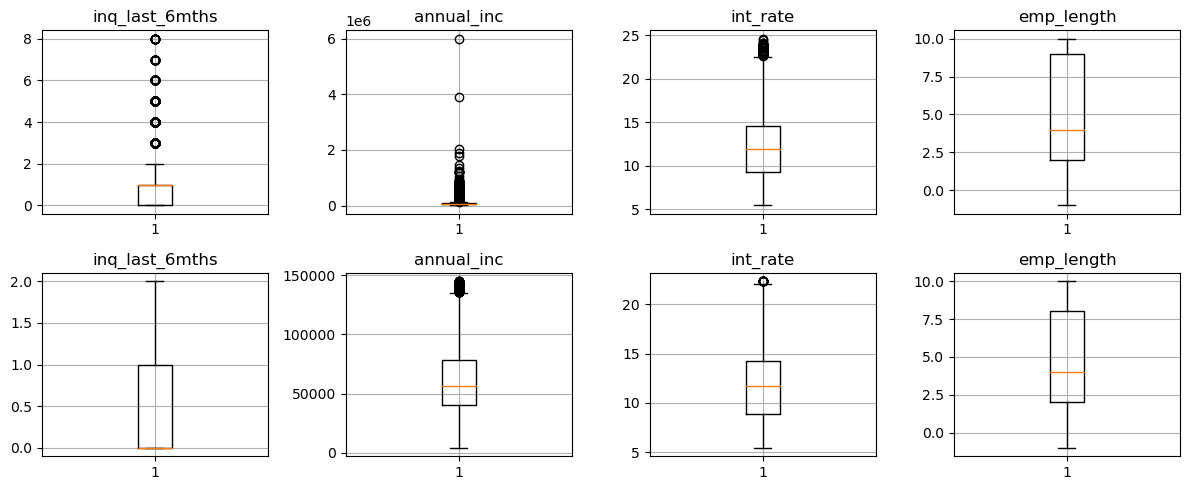

In [18]:
fig, axs = plt.subplots(2, 4, figsize=(12, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
#columns to plot
#total_acc, *int_rate, installment, *annual_inc
#col_array = ["total_acc","int_rate","annual_inc","installment"] - did not work and ((((recoveries *** Special Case))))
col_array = ['inq_last_6mths','annual_inc','int_rate','emp_length']# ,'open_acc','installment','int_rate']
for i, col in enumerate(col_array):
    ax = axs[0, i%4]
    ax.grid(True)
    ax.boxplot(df[col])
    ax.set_title(col)

for i, col in enumerate(col_array):
    df = fix_numeric_IQR_range(col,df)
    ax = axs[1, i%4]
    ax.grid(True)
    ax.boxplot(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()


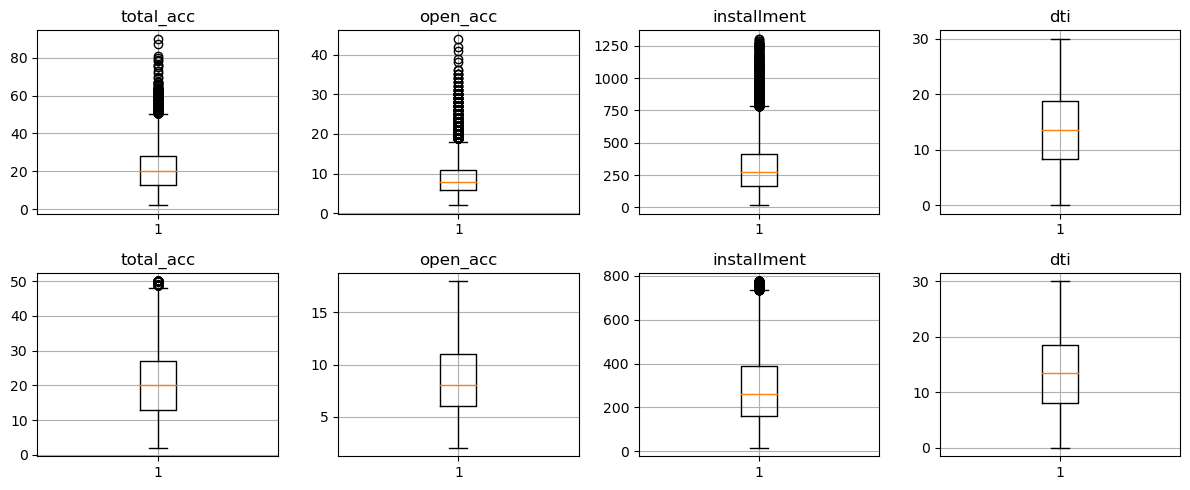

In [19]:
fig, axs = plt.subplots(2, 4, figsize=(12, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
#columns to plot
#total_acc, *int_rate, installment, *annual_inc
#col_array = ["total_acc","int_rate","annual_inc","installment"] - did not work and ((((recoveries *** Special Case))))
# done - col_array = ['inq_last_6mths','annual_inc','int_rate','total_acc']# ,'open_acc','installment','int_rate']
col_array = ['total_acc','open_acc','installment','dti']
for i, col in enumerate(col_array):
    ax = axs[0, i%4]
    ax.grid(True)
    ax.boxplot(df[col])
    ax.set_title(col)

for i, col in enumerate(col_array):
    df = fix_numeric_IQR_range(col,df)
    ax = axs[1, i%4]
    ax.grid(True)
    ax.boxplot(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()


## This is a special case field that requires segmented analysis to perform the distribution analysis. 
* This is because the value for this field only exists when the loan_status is “Charged_Off”. 
* Hence considering all fields will distort summary metrics.

Text(0.5, 1.0, 'Segmented by \'loan_status\' of "Charged Off" for recoveries')

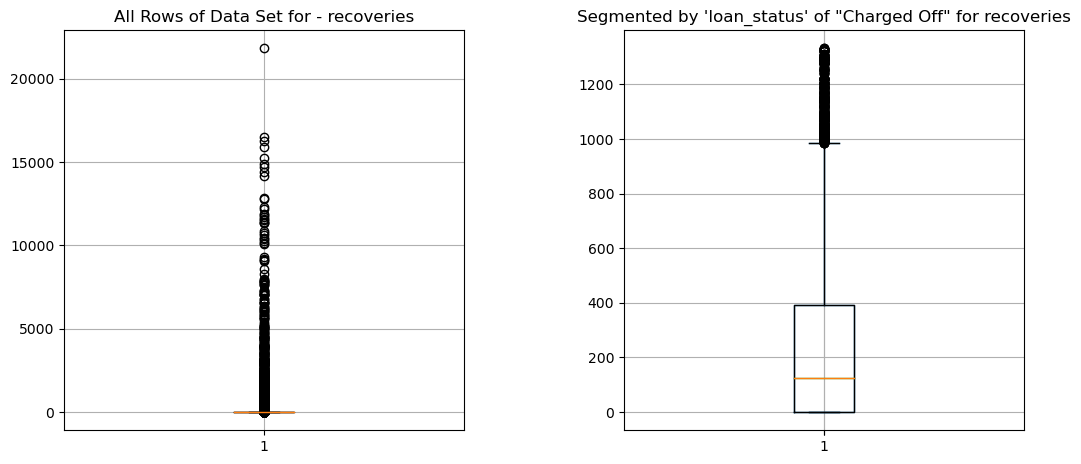

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
#recoveries
#df.recoveries.plot.box()

#for the recovery analysis - eleminate [Fully Paid , Current] as there is no recovery for these statues 
#Charged Off
df1 = df[df['loan_status']=='Charged Off']
df1 = fix_numeric_IQR_range('recoveries',df1)
df1.recoveries.plot.box()


ax = axs[0]
ax.grid(True)
ax.boxplot(df['recoveries'])
ax.set_title("All Rows of Data Set for - recoveries")

ax = axs[1]
ax.grid(True)
ax.boxplot(df1.recoveries)
ax.set_title('Segmented by \'loan_status\' of \"Charged Off\" for recoveries')

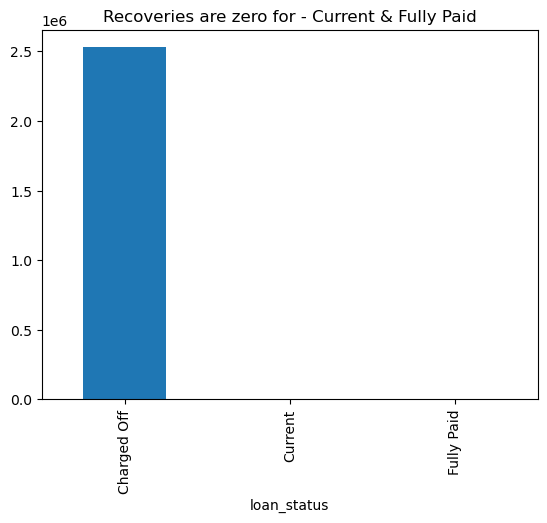

In [21]:
plt.title('Recoveries are zero for - Current & Fully Paid')
df.groupby('loan_status')['recoveries'].sum().plot.bar()
plt.show()

### Lets look at emp_length and defaults (Charge Off)

<Axes: xlabel='emp_length,loan_status'>

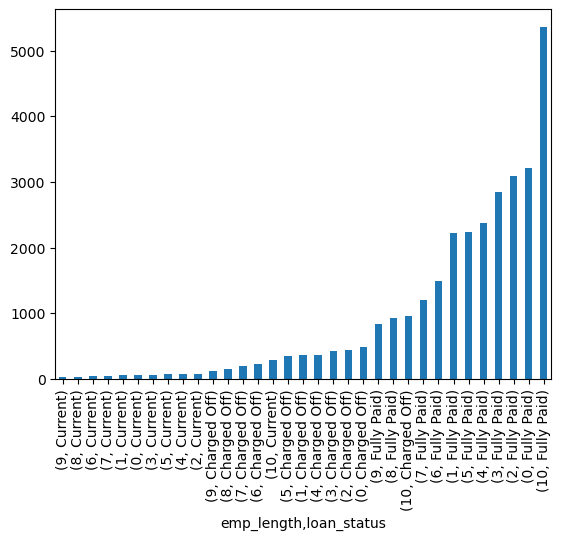

In [22]:
#emp_length vs defaults 
df2 = df[df.loan_status=='Charged Off']
df[df.emp_length!=-1].groupby(by=['emp_length','loan_status'])['loan_status'].count().sort_values().plot.bar()
#df[df.emp_length!=-1].groupby(by=['emp_length','loan_status'])['loan_status'].count().unstack().plot.bar(stacked=True)


<Axes: xlabel='emp_length'>

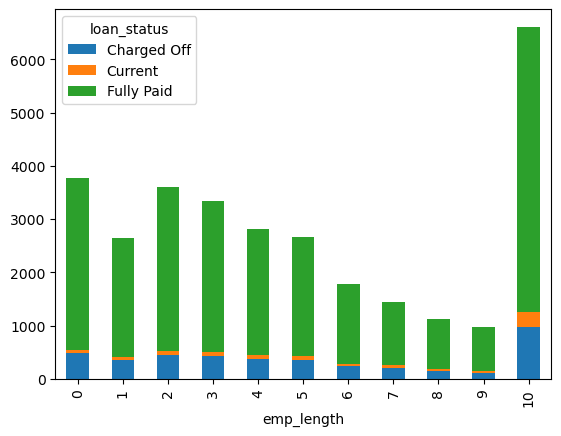

In [23]:
#emp_length vs defaults 
df2 = df[df.loan_status=='Charged Off']
#df[df.emp_length!=-1].groupby(by=['emp_length','loan_status'])['loan_status'].count().sort_values().plot.bar()
df[df.emp_length!=-1].groupby(by=['emp_length','loan_status'])['loan_status'].count().unstack().plot.bar(stacked=True)


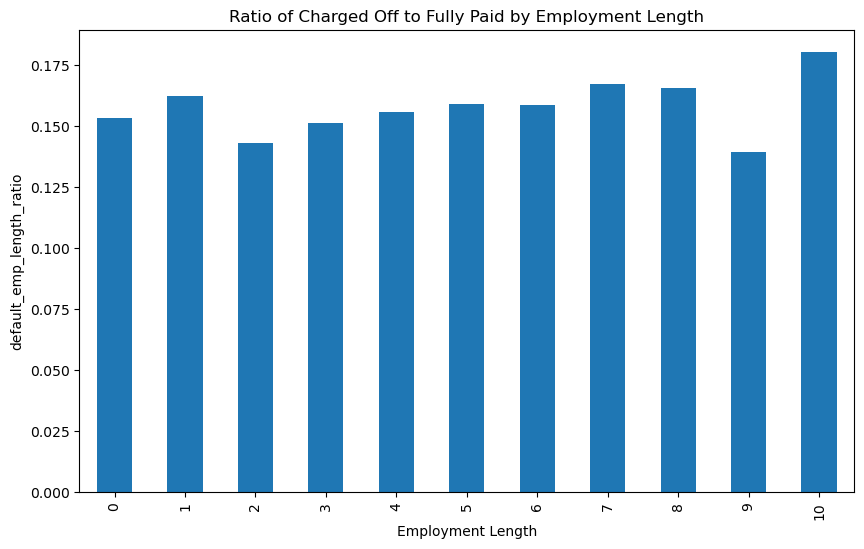

In [24]:
default_emp_length_ratio = df[(df['loan_status'] == 'Charged Off') & (df.emp_length!= -1)].groupby('emp_length').size() / df[(df['loan_status'] == 'Fully Paid') & (df.emp_length!= -1)].groupby('emp_length').size().sort_values()
default_emp_length_ratio.plot(kind='bar', figsize=(10, 6), title='Ratio of Charged Off to Fully Paid by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('default_emp_length_ratio')
plt.show()

### Lets look at states and defaults (Charge Off)

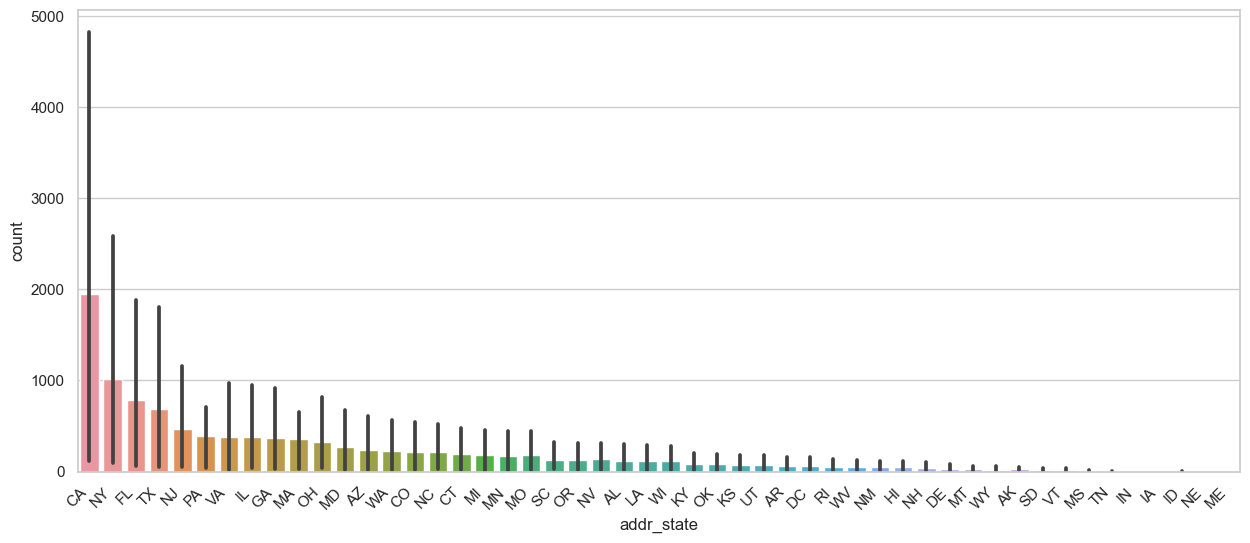

In [25]:
df2 = df.groupby(['addr_state', 'loan_status']).size().reset_index(name='count')
df2 = df2.sort_values(by='count', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6)) 
stateplt = sns.barplot(x='addr_state', y='count', data=df2)
stateplt.set_xticklabels(stateplt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()       

### Lets look at the states where the Loan business volume is more

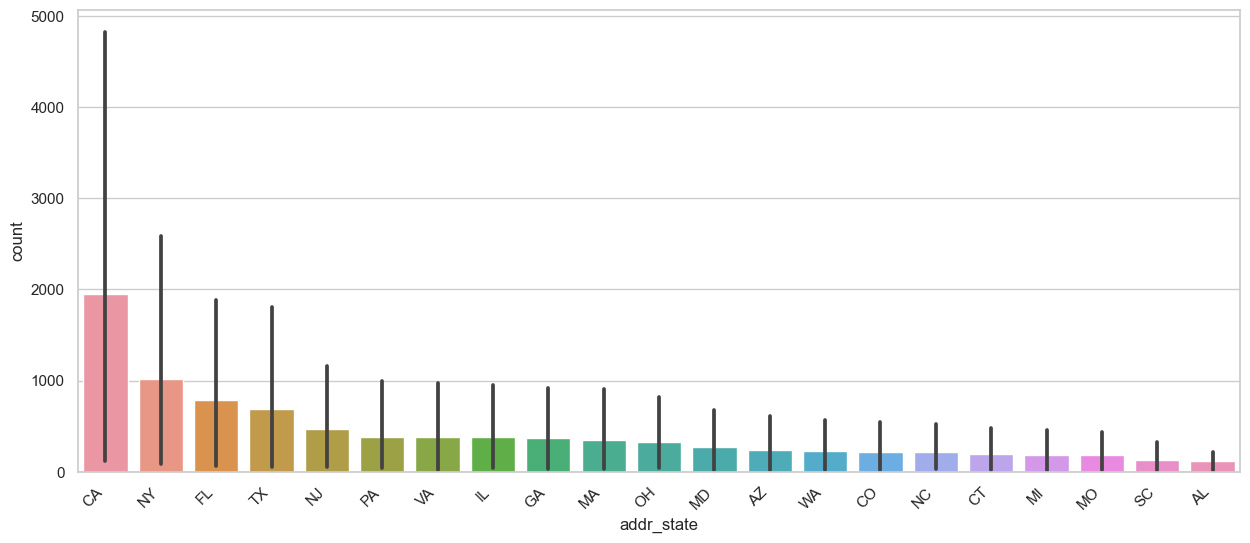

In [26]:
df2 = df[df.addr_state.isin(['CA','NY','TX','FL','NJ','PA','IL','VA','GA','MA','OH','MD','AZ','WA','CO','NC','CT','MI','MO','SC','AL'])]
df2 = df2.groupby(['addr_state', 'loan_status']).size().reset_index(name='count')
df2 = df2.sort_values(by='count', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6)) 
stateplt = sns.barplot(x='addr_state', y='count', data=df2)
stateplt.set_xticklabels(stateplt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()       

* # Ratio of charged off / fully paid by state (Business Volume)

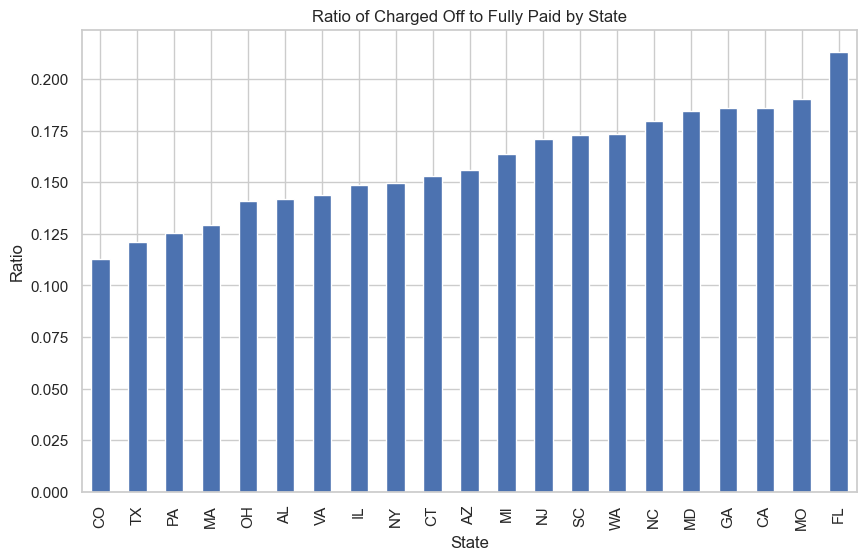

In [27]:
#ratio = dfpt[(dfpt['loan_status'] == 'Charged Off')].groupby('addr_state').size() / dfpt[(dfpt['loan_status'] == 'Fully Paid') ].groupby('addr_state').size()
# Group by 'addr_state' and 'loan_status' and count occurrences
dfpt=df
#removing all other states where the business is very low
dfpt = dfpt[dfpt.addr_state.isin(['CA','NY','TX','FL','NJ','PA','IL','VA','GA','MA','OH','MD','AZ','WA','CO','NC','CT','MI','MO','SC','AL'])]
state_charge_off_to_paid_off_ratio = dfpt[(dfpt['loan_status'] == 'Charged Off')].groupby('addr_state').size() / dfpt[(dfpt['loan_status'] == 'Fully Paid') ].groupby('addr_state').size()
state_charge_off_to_paid_off_ratio.sort_values().plot(kind='bar', figsize=(10, 6), title='Ratio of Charged Off to Fully Paid by State')
plt.xlabel('State')
plt.ylabel('Ratio')
plt.show()

* Segmented - Univariate Analysis - Loan Purpose

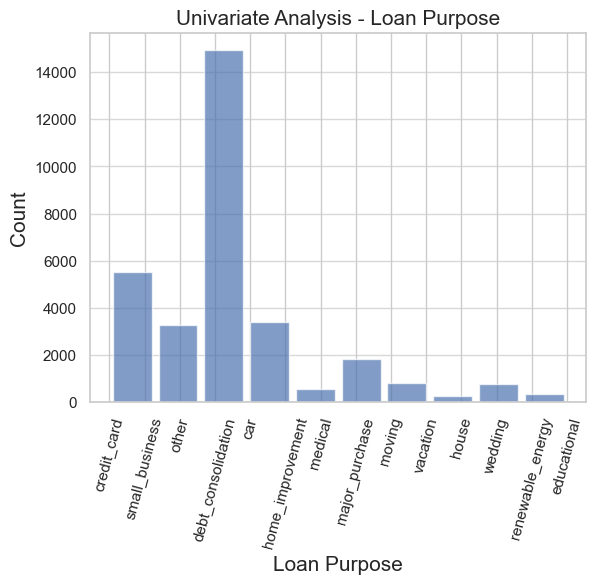

In [28]:
plt.hist(df['purpose'], rwidth=0.85, alpha=0.7)
plt.xlabel('Loan Purpose', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y',alpha=0.75)
plt.xticks(rotation=75)
plt.title('Univariate Analysis - Loan Purpose', fontsize=15)
plt.show()

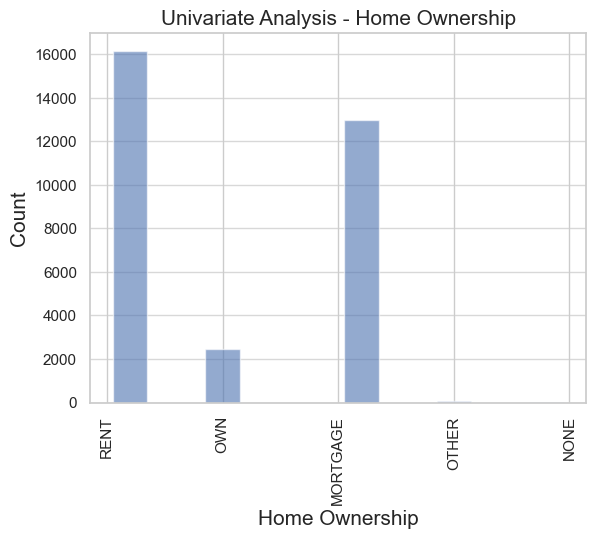

In [29]:
plt.hist(df['home_ownership'], rwidth=0.75, alpha=0.6)
plt.xlabel('Home Ownership', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y',alpha=0.75)
plt.xticks(rotation='vertical')
plt.title('Univariate Analysis - Home Ownership', fontsize=15)
plt.show()

* Length of loan and interest rates

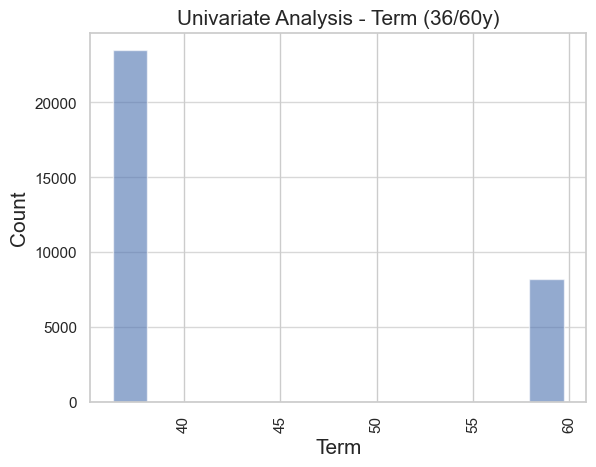

In [30]:
plt.hist(df['term'], rwidth=0.75, alpha=0.6)
plt.xlabel('Term', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y',alpha=0.75)
plt.xticks(rotation='vertical')
plt.title('Univariate Analysis - Term (36/60y)', fontsize=15)
plt.show()

In [31]:
df2 = df.groupby('term')['int_rate'].mean().reset_index()
df2

,term,int_rate
0,36,10.812093
1,60,14.470891


In [32]:
df[['revol_bal','annual_inc']].corr()

,revol_bal,annual_inc
revol_bal,1.000000,0.382001
annual_inc,0.382001,1.000000


In [33]:
df[['installment','annual_inc']].corr()

,installment,annual_inc
installment,1.000000,0.346943
annual_inc,0.346943,1.000000


In [34]:
df[['installment','int_rate']].corr()

,installment,int_rate
installment,1.000000,0.234965
int_rate,0.234965,1.000000


* ## converting loan status to numaric to study correlations

In [35]:
df['num_loan_status'] = df.loan_status.apply(lambda x: -1 if x == 'Charged Off' else 0 if x == 'Current' else 1)

In [36]:
df.num_loan_status.unique()

array([ 1,  0, -1], dtype=int64)

In [37]:
df[['int_rate','num_loan_status']].corr()

,int_rate,num_loan_status
int_rate,1.000000,-0.224658
num_loan_status,-0.224658,1.000000


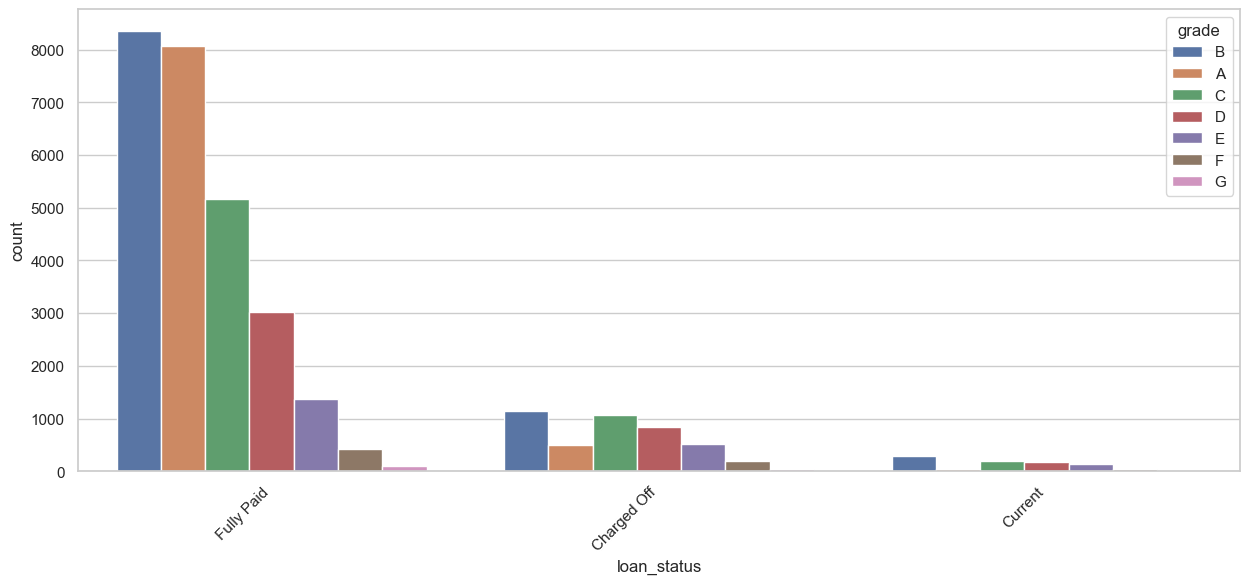

In [38]:
dfg = df.groupby(['grade', 'loan_status']).size().reset_index(name='count')
dfg = dfg.sort_values(by='count', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6)) 
stateplt = sns.barplot(x='loan_status', y='count', hue='grade', data=dfg)
stateplt.set_xticklabels(stateplt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show() 

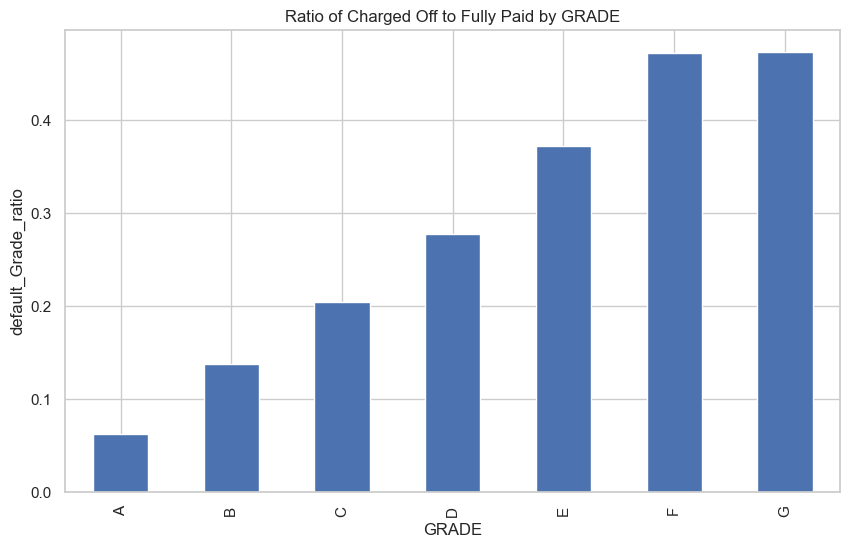

In [39]:
default_emp_length_ratio = df[(df['loan_status'] == 'Charged Off')].groupby('grade').size() / df[(df['loan_status'] == 'Fully Paid') ].groupby('grade').size().sort_values()
default_emp_length_ratio.plot(kind='bar', figsize=(10, 6), title='Ratio of Charged Off to Fully Paid by GRADE')
plt.xlabel('GRADE')
plt.ylabel('default_Grade_ratio')
plt.show()

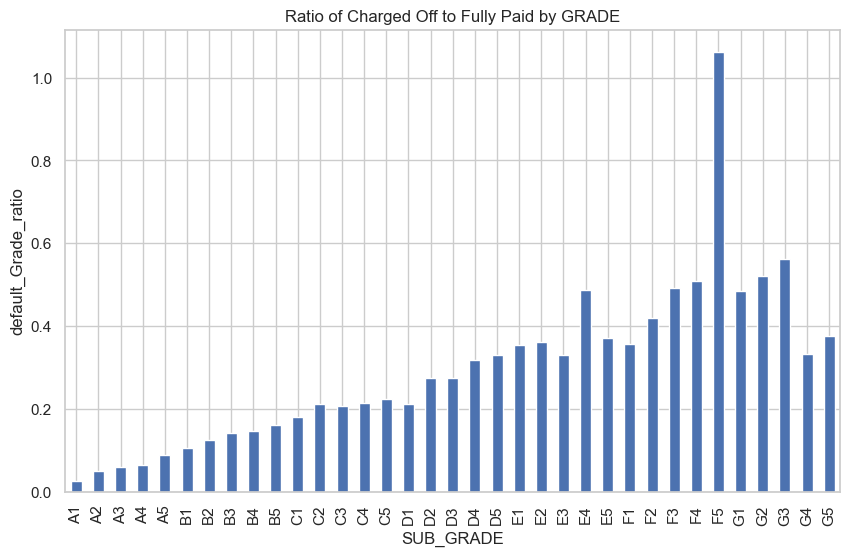

In [40]:
default_emp_length_ratio = df[(df['loan_status'] == 'Charged Off')].groupby('sub_grade').size() / df[(df['loan_status'] == 'Fully Paid') ].groupby('sub_grade').size().sort_values()
default_emp_length_ratio.plot(kind='bar', figsize=(10, 6), title='Ratio of Charged Off to Fully Paid by GRADE')
plt.xlabel('SUB_GRADE')
plt.ylabel('default_Grade_ratio')
plt.show()

In [41]:
df_fp = df[df.loan_status == 'Fully Paid']
df_co = df[df.loan_status == 'Charged Off']
df_c = df[df.loan_status == 'Current']
fpp = (df_fp.loan_status.count()/df.loan_status.count())*100
cop = (df_co.loan_status.count()/df.loan_status.count())*100
cp = (df_c.loan_status.count()/df.loan_status.count())*100
print('{} of customers are Fully Paid,{} are Charged Off and {} are Current'.format(fpp,cop,cp))

83.61473159339793 of customers are Fully Paid,13.604948401552688 are Charged Off and 2.7803200050493895 are Current


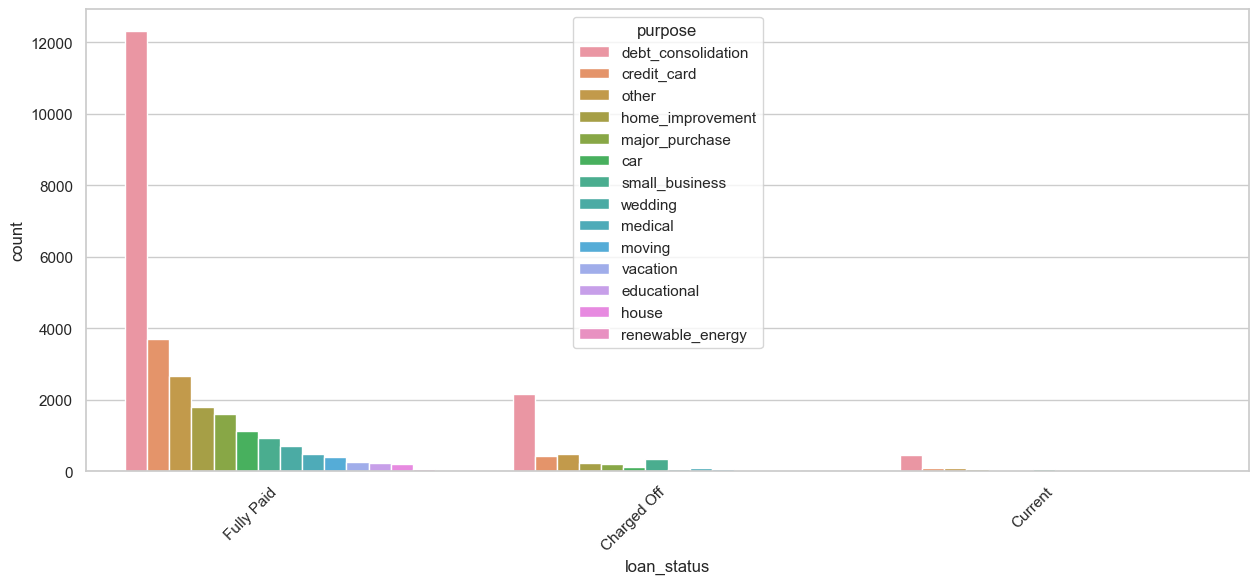

In [42]:

df_purpose_ls = df.groupby(['purpose', 'loan_status']).size().reset_index(name='count')
df_purpose_ls = df_purpose_ls.sort_values(by='count', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))  
stateplt = sns.barplot(x='loan_status', y='count', hue='purpose', data=df_purpose_ls)


stateplt.set_xticklabels(stateplt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show() 

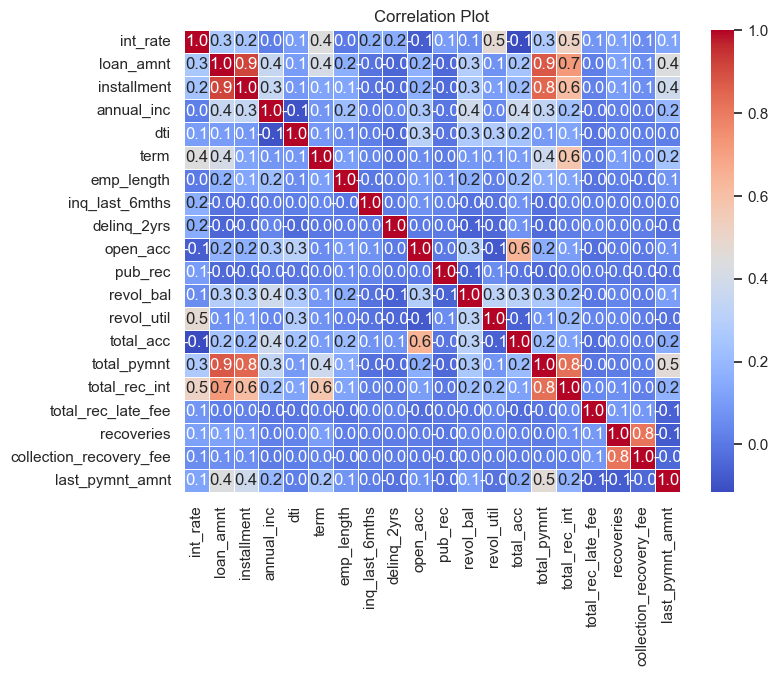

In [43]:
corr = df[['int_rate','loan_amnt', 'installment', 'annual_inc', 'dti','term','emp_length','inq_last_6mths','delinq_2yrs','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']].fillna(0).corr()
#sns.heatmap(corr)
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.4)
plt.title('Correlation Plot')
plt.show()

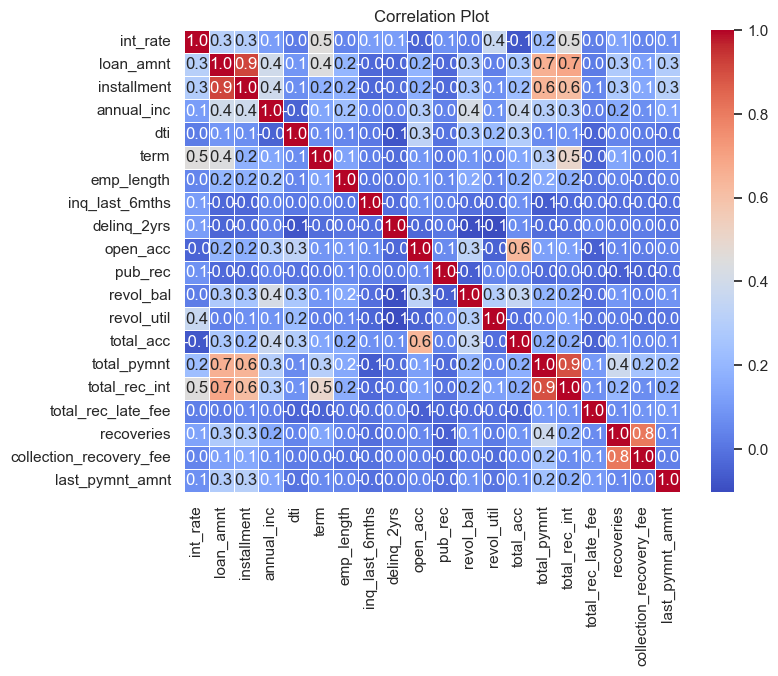

In [44]:
corr = df[df['loan_status']=='Charged Off'][['int_rate','loan_amnt', 'installment', 'annual_inc', 'dti','term','emp_length','inq_last_6mths','delinq_2yrs','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']].fillna(0).corr()
#sns.heatmap(corr)
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.4)
plt.title('Correlation Plot')
plt.show()

In [45]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,num_loan_status
count,3.168700e+04,3.168700e+04,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31687.000000,31158.000000,31687.000000
mean,6.842548e+05,8.522176e+05,10087.619529,9827.314040,9371.163409,42.220595,11.760423,289.684948,4.679995,59141.620193,13.312010,0.141509,0.615962,8.608136,0.056522,11766.394105,49.322425,20.193518,43.808401,43.618384,10896.866086,10403.287124,8843.280970,1972.599764,1.211899,79.773528,10.133784,2360.896833,0.044836,0.700098
std,2.096557e+05,2.640949e+05,6285.314071,5952.614025,5935.238310,10.516747,3.616250,165.978493,3.610315,27166.659879,6.677049,0.478387,0.742520,3.642403,0.238989,13166.330035,28.330549,9.754186,321.029146,319.797605,7507.617658,7455.192903,5902.687565,2153.404192,6.405122,568.968854,124.184841,3834.037953,0.207876,0.694316
min,5.574200e+04,8.491400e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,-1.000000,4000.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,5.196600e+05,6.711835e+05,5000.000000,5000.000000,4966.226448,36.000000,8.900000,160.460000,2.000000,39500.000000,8.140000,0.000000,0.000000,6.000000,0.000000,3477.000000,26.100000,13.000000,0.000000,0.000000,5371.306531,4898.990000,4307.425000,621.765000,0.000000,0.000000,0.000000,206.740000,0.000000,1.000000
50%,6.666070e+05,8.520790e+05,9000.000000,8800.000000,8000.000000,36.000000,11.580000,261.570000,4.000000,54833.520000,13.400000,0.000000,0.000000,8.000000,0.000000,8214.000000,49.900000,19.000000,0.000000,0.000000,9185.322244,8689.130000,7800.000000,1239.100000,0.000000,0.000000,0.000000,490.960000,0.000000,1.000000
75%,8.357385e+05,1.045214e+06,14000.000000,13562.500000,12800.000000,60.000000,14.220000,389.930000,8.000000,75000.000000,18.590000,0.000000,1.000000,11.000000,0.000000,15458.000000,72.800000,27.000000,0.000000,0.000000,14907.645520,14346.480000,12000.000000,2467.970000,0.000000,0.000000,0.000000,2999.770000,0.000000,1.000000
max,1.077501e+06,1.313524e+06,35000.000000,35000.000000,35000.000000,60.000000,22.350000,774.760000,10.000000,144996.000000,29.990000,9.000000,2.000000,18.000000,4.000000,149000.000000,99.900000,50.000000,5221.660000,5214.110000,46018.480000,45824.940000,35000.000000,17267.350000,165.690000,21810.310000,5774.800000,35339.050000,2.000000,1.000000
